In [ ]:
import numpy as np
from keras.datasets import cifar10
from skimage import transform
import matplotlib.pyplot as plt

**CIFAR_10 Dataset**

CIFAR-10 is a challenging dataset due to its small image size and low resolution compared to other datasets. However, it serves as a good starting point for developing and testing image classification algorithms.It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

1.Airplane

2.Automobile

3.Bird

4.Cat

5.Deer

6.Dog

7.Frog

8.Horse

9.Ship

10.Truck

In [ ]:
#Loading data and splitting the data for training and testing

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
#preprocessing (reshaping 2D target into 1D target)

In [ ]:
y_train=y_train.ravel()
y_test=y_test.ravel()

In [ ]:
#importing the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=150)

In [ ]:
#training the model with train data

In [ ]:
model.fit(x_train.reshape(len(x_train),-1)
,y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
#testing the model with test data

In [ ]:
y_pred=model.predict(x_test.reshape(len(x_test),-1))

In [ ]:
#model evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.53      0.55      0.54      1000
           2       0.38      0.33      0.35      1000
           3       0.36      0.29      0.32      1000
           4       0.40      0.39      0.40      1000
           5       0.45      0.41      0.43      1000
           6       0.48      0.59      0.53      1000
           7       0.53      0.47      0.50      1000
           8       0.59      0.63      0.61      1000
           9       0.48      0.56      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.48      0.47     10000



In [ ]:
X_test=[]
for x in x_test:
  rescale=transform.resize(x,(100,100))
  X_test.append(rescale)
X_test=np.array(X_test)

In [ ]:
#data visualization

In [ ]:
label_names=["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

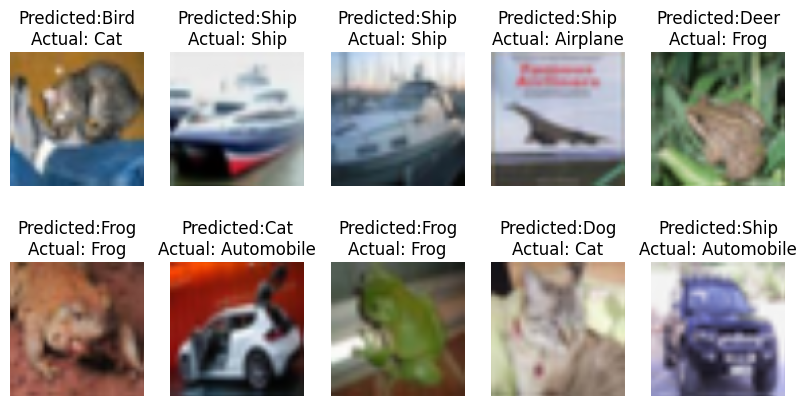

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i],cmap="gray")
  plt.axis("off")
  plt.title(f"Predicted:{label_names[y_pred[i]]}\nActual: {label_names[y_test[i]]}")
plt.show()
